In [8]:
import numpy as np
import pandas as pd
import tflite_runtime.interpreter as tflite
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Load the .csv dataset
dataset = pd.read_csv("EncodedStreamingDataset.csv")

In [3]:
# 2. Extract features and labels
X = dataset.drop(columns=["attack"]).values
y_true = dataset["attack"].values

In [4]:
# 3. Load the .tflite model
interpreter = tflite.Interpreter(model_path="OptimizedNeuralNetwork.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [5]:
# 4. Perform inference using the model
y_pred = []
for sample in X:
    # Reshape the sample to fit the input tensor
    sample = np.expand_dims(sample, axis=0).astype(input_details[0]['dtype'])
    
    interpreter.set_tensor(input_details[0]['index'], sample)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])[0]
    
    # Assuming your model returns a binary classification probability, 
    # we threshold at 0.5 to get a 0 or 1 label.
    predicted_label = 1 if output_data[0] >= 0.5 else 0
    y_pred.append(predicted_label)

In [6]:
# 5. Calculate the accuracy
accuracy = np.mean(np.array(y_pred) == y_true)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.90%


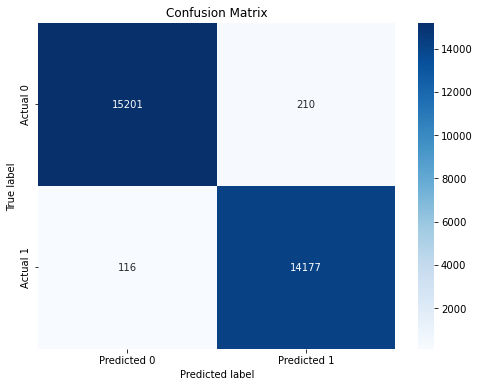

In [9]:
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()